In [1]:
import warnings
import pandas as pd

from sklearn.model_selection import train_test_split

from functions import load_dataset, fine_tune_and_cross_validate, test_model, load_subset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier


In [2]:
df = load_subset(target="task1")
X,y = df.drop('target', axis=1), df['target']
print(X.shape, y.shape, y.value_counts(normalize=True))

(20353, 102) (20353,) target
0    0.539134
1    0.460866
Name: proportion, dtype: float64


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# define param grids for each model

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'hamming']
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 1000]
}

param_grid_bnb = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_prior': [True, False], 
    'binarize': [0.0, 0.5, 1.0]  # Threshold for binarizing features
}   


Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6254, F1: 0.6143, Recall: 0.6254, Precision: 0.6267
Fold 2 - Accuracy: 0.6242, F1: 0.6137, Recall: 0.6242, Precision: 0.6250
Fold 3 - Accuracy: 0.6143, F1: 0.6031, Recall: 0.6143, Precision: 0.6142
Fold 4 - Accuracy: 0.6115, F1: 0.6018, Recall: 0.6115, Precision: 0.6106
Fold 5 - Accuracy: 0.6296, F1: 0.6182, Recall: 0.6296, Precision: 0.6317

Overall Cross-validation results:

	- Accuracy: 0.6210 ± 0.0069
	- F1 Score: 0.6102 ± 0.0065
	- Recall: 0.6210 ± 0.0069
	- Precision: 0.6216 ± 0.0079
	- ROC AUC: 0.6497 ± 0.0068


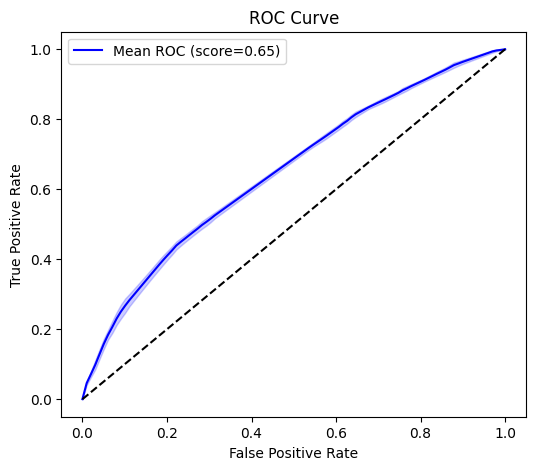

In [5]:
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
accuracy_dt, f1_dt, recall_dt, precision_dt, accuracy_std_dt, f1_std_dt, recall_std_dt, precision_std_dt, best_model_dt, best_params_dt = fine_tune_and_cross_validate(X_train, y_train, model_dt, param_grid_dt)

Decision Tree - Accuracy: 0.6291, F1: 0.6188, Recall: 0.6291, Precision: 0.6303
Decision Tree - ROC AUC: 0.6641


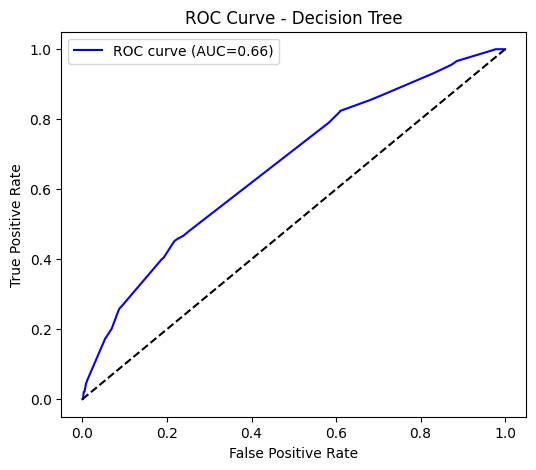

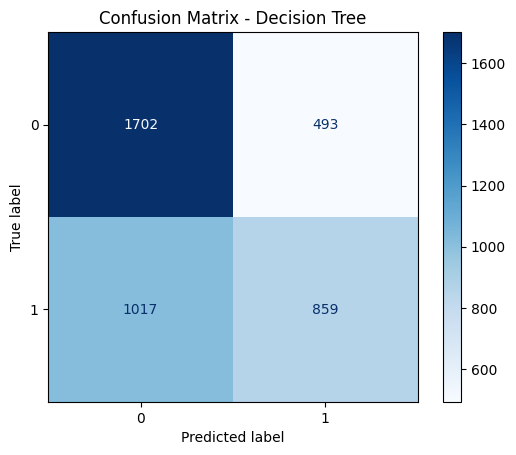

{'accuracy': 0.6290837632031442,
 'f1': 0.6187545788586425,
 'recall': 0.6290837632031442,
 'precision': 0.6302923485597132,
 'roc_auc': 0.6640745588685275}

In [6]:
model = DecisionTreeClassifier(**best_params_dt, random_state=42)
test_model(model, X_train, y_train, X_test, y_test, model_name="Decision Tree")

## Random Forest

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6325, F1: 0.6185, Recall: 0.6325, Precision: 0.6369
Fold 2 - Accuracy: 0.6521, F1: 0.6420, Recall: 0.6521, Precision: 0.6560
Fold 3 - Accuracy: 0.6305, F1: 0.6179, Recall: 0.6305, Precision: 0.6335
Fold 4 - Accuracy: 0.6216, F1: 0.6054, Recall: 0.6216, Precision: 0.6259
Fold 5 - Accuracy: 0.6281, F1: 0.6149, Recall: 0.6281, Precision: 0.6312

Overall Cross-validation results:

	- Accuracy: 0.6330 ± 0.0103
	- F1 Score: 0.6197 ± 0.0121
	- Recall: 0.6330 ± 0.0103
	- Precision: 0.6367 ± 0.0103
	- ROC AUC: 0.6743 ± 0.0105


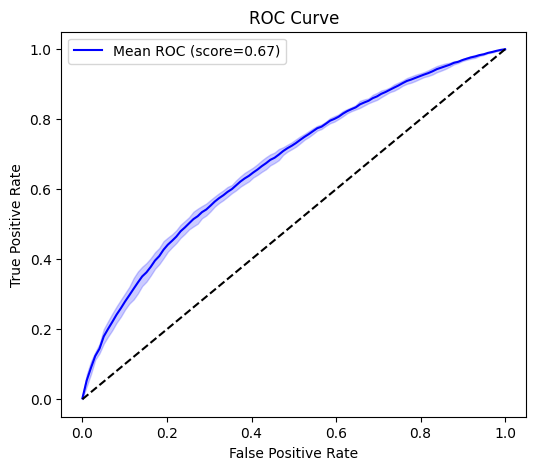

In [7]:
# Random Forest
model_rf = RandomForestClassifier(random_state=42)
accuracy_rf, f1_rf, recall_rf, precision_rf, accuracy_std_rf, f1_std_rf, recall_std_rf, precision_std_rf, best_model_rf, best_params_rf = fine_tune_and_cross_validate(X_train, y_train, model_rf, param_grid_rf)

Random Forest - Accuracy: 0.6318, F1: 0.6188, Recall: 0.6318, Precision: 0.6353
Random Forest - ROC AUC: 0.6860


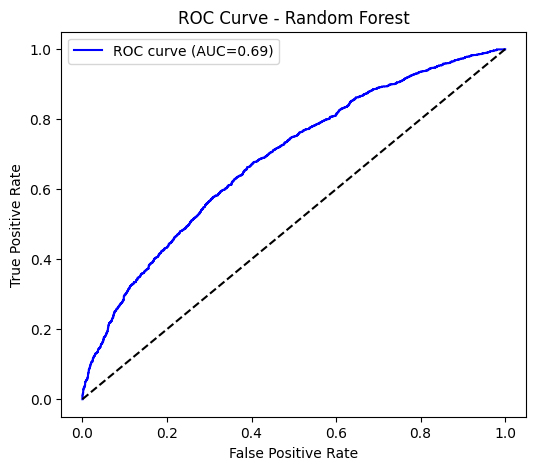

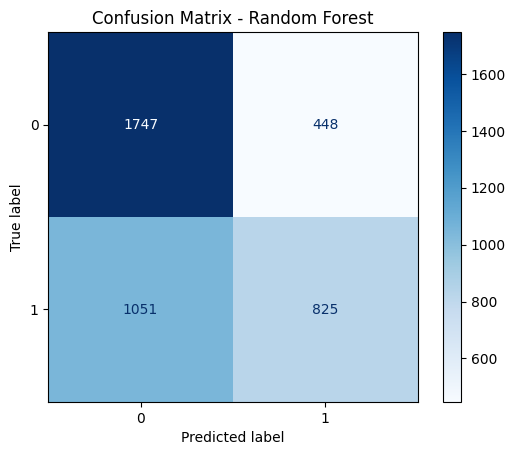

{'accuracy': 0.6317858020142472,
 'f1': 0.6187656955039165,
 'recall': 0.6317858020142472,
 'precision': 0.6352963935330531,
 'roc_auc': 0.6859527614125922}

In [8]:
model = RandomForestClassifier(**best_params_rf, random_state=42)
test_model(model, X_train, y_train, X_test, y_test, model_name="Random Forest")

## KNN

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.5557, F1: 0.5484, Recall: 0.5557, Precision: 0.5508
Fold 2 - Accuracy: 0.5738, F1: 0.5672, Recall: 0.5738, Precision: 0.5700
Fold 3 - Accuracy: 0.5623, F1: 0.5563, Recall: 0.5623, Precision: 0.5581
Fold 4 - Accuracy: 0.5657, F1: 0.5602, Recall: 0.5657, Precision: 0.5618
Fold 5 - Accuracy: 0.5688, F1: 0.5633, Recall: 0.5688, Precision: 0.5650

Overall Cross-validation results:

	- Accuracy: 0.5653 ± 0.0061
	- F1 Score: 0.5591 ± 0.0064
	- Recall: 0.5653 ± 0.0061
	- Precision: 0.5611 ± 0.0065
	- ROC AUC: 0.5790 ± 0.0078


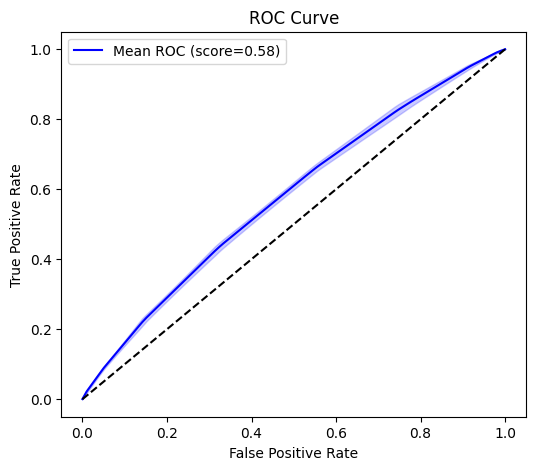

In [9]:
model_knn = KNeighborsClassifier()
accuracy_knn, f1_knn, recall_knn, precision_knn, accuracy_std_knn, f1_std_knn, recall_std_knn, precision_std_knn, best_model_knn, best_params_knn = fine_tune_and_cross_validate(X_train, y_train, model_knn, param_grid_knn)

Knn - Accuracy: 0.5770, F1: 0.5696, Recall: 0.5770, Precision: 0.5732
Knn - ROC AUC: 0.5958


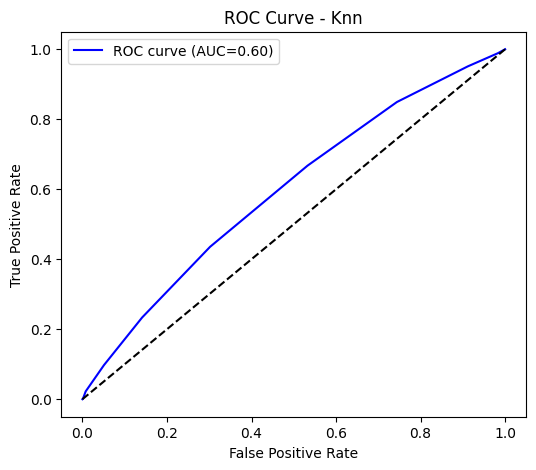

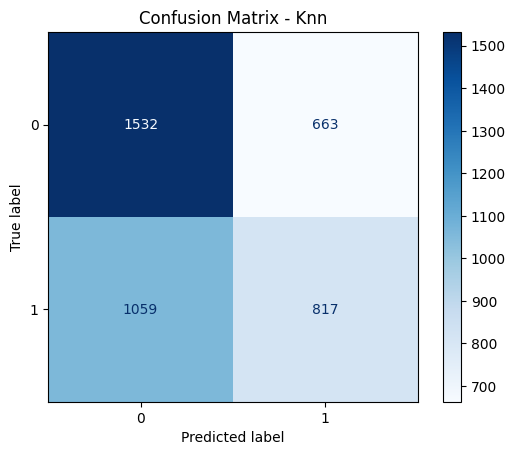

{'accuracy': 0.5770081061164333,
 'f1': 0.5695515442411015,
 'recall': 0.5770081061164333,
 'precision': 0.5731900793625141,
 'roc_auc': 0.5958355391930682}

In [10]:
model = KNeighborsClassifier(**best_params_knn)
test_model(model, X_train, y_train, X_test, y_test, model_name="Knn")

## Logistic Regression

Best hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6248, F1: 0.6017, Recall: 0.6248, Precision: 0.6359
Fold 2 - Accuracy: 0.6368, F1: 0.6172, Recall: 0.6368, Precision: 0.6477
Fold 3 - Accuracy: 0.6060, F1: 0.5820, Recall: 0.6060, Precision: 0.6120
Fold 4 - Accuracy: 0.6035, F1: 0.5803, Recall: 0.6035, Precision: 0.6085
Fold 5 - Accuracy: 0.6155, F1: 0.5945, Recall: 0.6155, Precision: 0.6220

Overall Cross-validation results:

	- Accuracy: 0.6173 ± 0.0123
	- F1 Score: 0.5952 ± 0.0136
	- Recall: 0.6173 ± 0.0123
	- Precision: 0.6252 ± 0.0147
	- ROC AUC: 0.6477 ± 0.0134


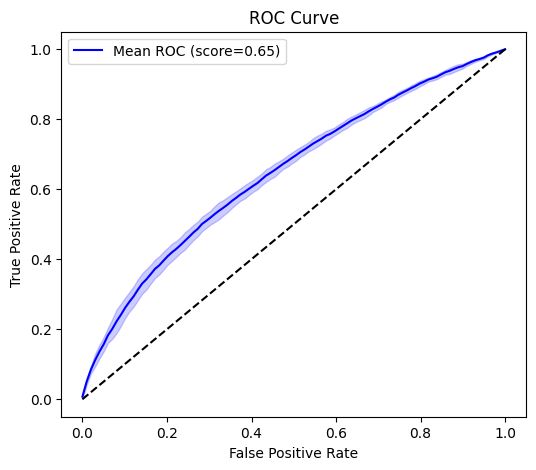

In [11]:
warnings.filterwarnings("ignore")
model_lr = LogisticRegression(random_state=42, max_iter=1000)
accuracy_lr, f1_lr, recall_lr, precision_lr, accuracy_std_lr, f1_std_lr, recall_std_lr, precision_std_lr, best_model_lr, best_params_lr = fine_tune_and_cross_validate(X_train, y_train, model_lr, param_grid_lr)

Logistic Regression - Accuracy: 0.6148, F1: 0.5946, Recall: 0.6148, Precision: 0.6206
Logistic Regression - ROC AUC: 0.6504


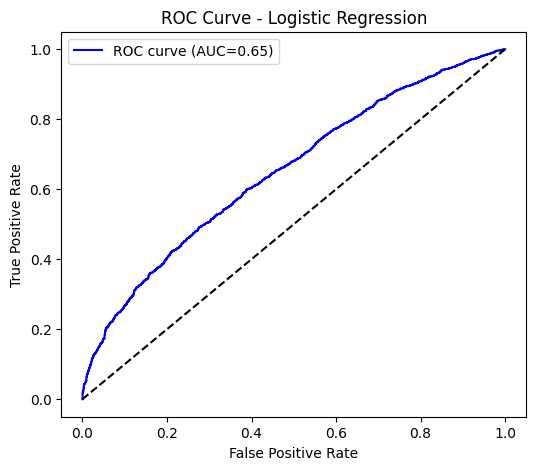

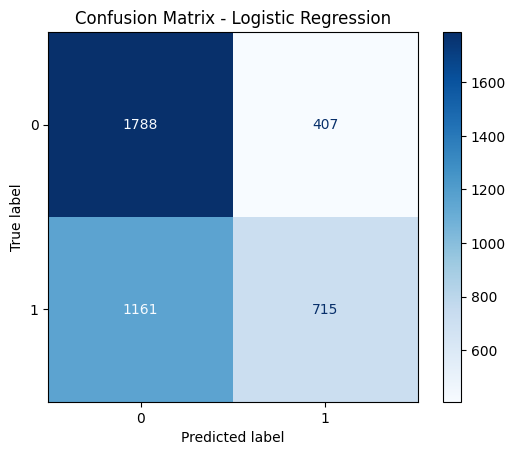

{'accuracy': 0.6148366494718742,
 'f1': 0.5946305058583782,
 'recall': 0.6148366494718742,
 'precision': 0.6205685458356036,
 'roc_auc': 0.6503894050735584}

In [12]:
model = LogisticRegression(**best_params_lr, random_state=42)
test_model(best_model_lr, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

## Bernoulli Naive Bayes

Best hyperparameters: {'alpha': 0.01, 'binarize': 1.0, 'fit_prior': True}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6064, F1: 0.5657, Recall: 0.6064, Precision: 0.6280
Fold 2 - Accuracy: 0.6214, F1: 0.5879, Recall: 0.6214, Precision: 0.6431
Fold 3 - Accuracy: 0.6014, F1: 0.5621, Recall: 0.6014, Precision: 0.6183
Fold 4 - Accuracy: 0.5921, F1: 0.5527, Recall: 0.5921, Precision: 0.6044
Fold 5 - Accuracy: 0.6066, F1: 0.5696, Recall: 0.6066, Precision: 0.6243

Overall Cross-validation results:

	- Accuracy: 0.6056 ± 0.0095
	- F1 Score: 0.5676 ± 0.0116
	- Recall: 0.6056 ± 0.0095
	- Precision: 0.6236 ± 0.0126
	- ROC AUC: 0.6062 ± 0.0152


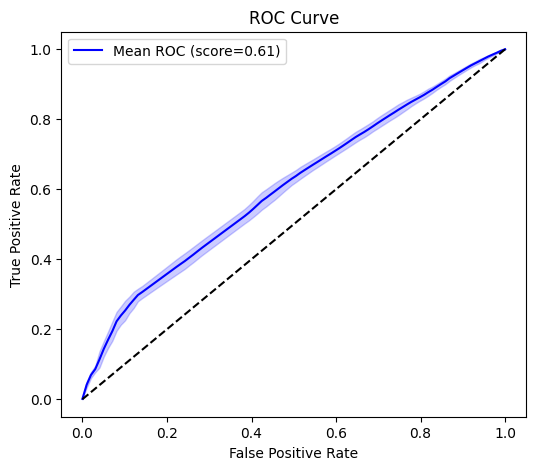

In [13]:
model_bnb = BernoulliNB()
accuracy_bnb, f1_bnb, recall_bnb, precision_bnb, accuracy_std_bnb, f1_std_bnb, recall_std_bnb, precision_std_bnb, best_model_bnb, best_params_bnb = fine_tune_and_cross_validate(X_train, y_train, model_bnb, param_grid_bnb)


Bernoulli Naive Bayes - Accuracy: 0.6087, F1: 0.5725, Recall: 0.6087, Precision: 0.6267
Bernoulli Naive Bayes - ROC AUC: 0.6083


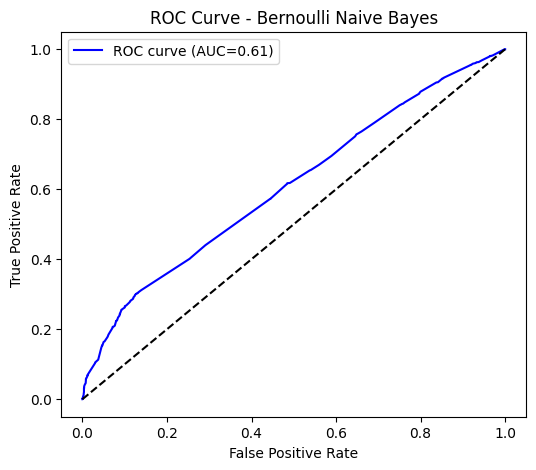

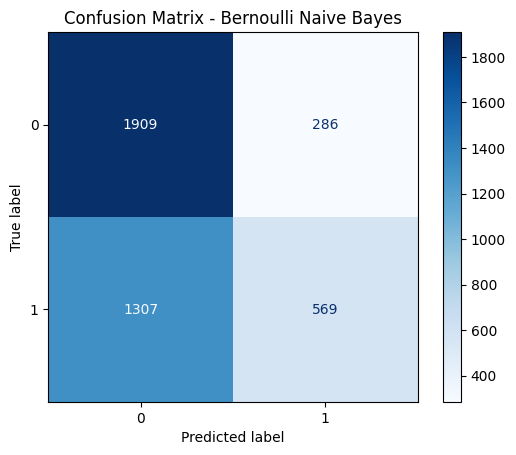

{'accuracy': 0.6086956521739131,
 'f1': 0.5724675169754858,
 'recall': 0.6086956521739131,
 'precision': 0.62672869127538,
 'roc_auc': 0.6082876376335051}

In [14]:
test_model(best_model_bnb, X_train, y_train, X_test, y_test, model_name="Bernoulli Naive Bayes")

### Feature Selection

In [15]:
data = pd.read_csv('selected_features.csv')
data.drop(['target'],axis=1,inplace=True)
columns = data.columns
columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican',
       'race_Caucasian', 'gender_Female', 'gender_Male', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'metformin_No', 'metformin_Steady', 'glipizide_No', 'glyburide_No',
       'pioglitazone_No', 'rosiglitazone_No', 'insulin_No', 'insulin_Steady',
       'change_Ch', 'change_No'],
      dtype='object')

In [16]:
X_train, X_test, y_train, y_test = X_train[columns], X_test[columns], y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16282, 30), (4071, 30), (16282,), (4071,))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6279, F1: 0.6215, Recall: 0.6279, Precision: 0.6269
Fold 2 - Accuracy: 0.6392, F1: 0.6298, Recall: 0.6392, Precision: 0.6410
Fold 3 - Accuracy: 0.6127, F1: 0.6077, Recall: 0.6127, Precision: 0.6106
Fold 4 - Accuracy: 0.6115, F1: 0.6018, Recall: 0.6115, Precision: 0.6106
Fold 5 - Accuracy: 0.6293, F1: 0.6177, Recall: 0.6293, Precision: 0.6314

Overall Cross-validation results:

	- Accuracy: 0.6241 ± 0.0106
	- F1 Score: 0.6157 ± 0.0099
	- Recall: 0.6241 ± 0.0106
	- Precision: 0.6241 ± 0.0119
	- ROC AUC: 0.6503 ± 0.0096


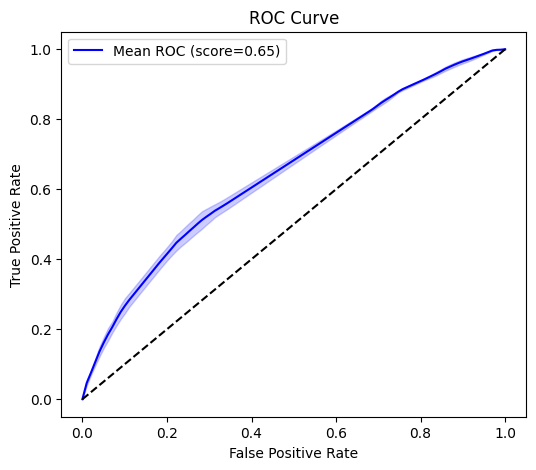

In [17]:
model_dt = DecisionTreeClassifier(random_state=42)
_, _, _, _, _, _, _, _, _, best_params = fine_tune_and_cross_validate(X_train, y_train, model_dt, param_grid_dt)

Decision Tree - Accuracy: 0.6276, F1: 0.6190, Recall: 0.6276, Precision: 0.6277
Decision Tree - ROC AUC: 0.6608


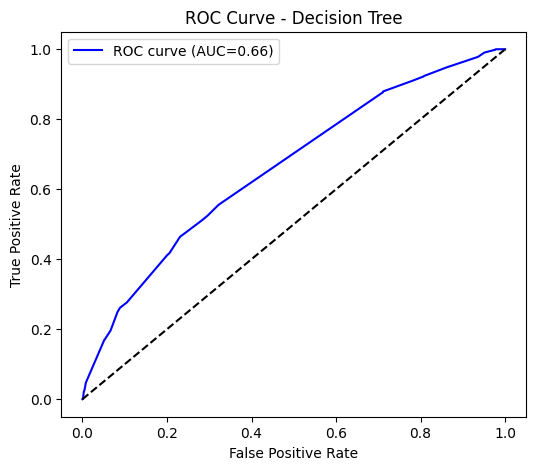

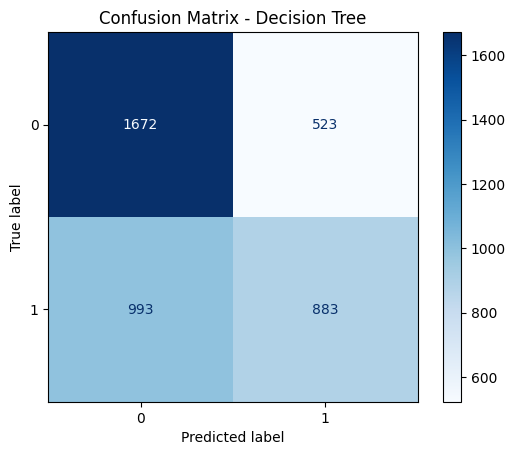

{'accuracy': 0.6276099238516335,
 'f1': 0.6189523119406677,
 'recall': 0.6276099238516335,
 'precision': 0.6276827316574626,
 'roc_auc': 0.6608105745272984}

In [18]:
model = DecisionTreeClassifier(**best_params, random_state=42)
test_model(model, X_train, y_train, X_test, y_test, model_name="Decision Tree")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6331, F1: 0.6197, Recall: 0.6331, Precision: 0.6371
Fold 2 - Accuracy: 0.6460, F1: 0.6368, Recall: 0.6460, Precision: 0.6483
Fold 3 - Accuracy: 0.6250, F1: 0.6135, Recall: 0.6250, Precision: 0.6264
Fold 4 - Accuracy: 0.6182, F1: 0.6043, Recall: 0.6182, Precision: 0.6203
Fold 5 - Accuracy: 0.6327, F1: 0.6213, Recall: 0.6327, Precision: 0.6351

Overall Cross-validation results:

	- Accuracy: 0.6310 ± 0.0093
	- F1 Score: 0.6191 ± 0.0107
	- Recall: 0.6310 ± 0.0093
	- Precision: 0.6334 ± 0.0096
	- ROC AUC: 0.6752 ± 0.0101


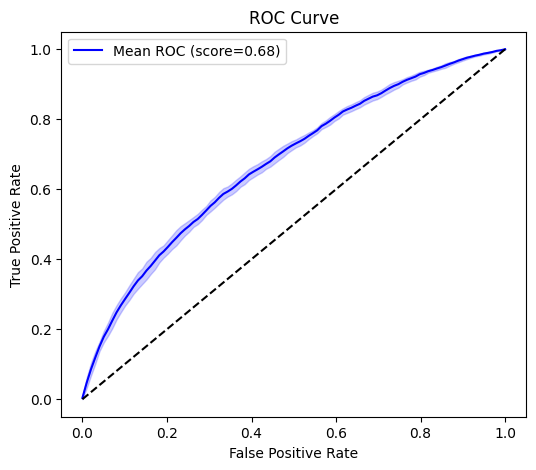

In [19]:
model_rf = RandomForestClassifier(random_state=42)
_, _, _, _, _, _, _, _, _, best_params = fine_tune_and_cross_validate(X_train, y_train, model_rf, param_grid_rf)

Random Forest - Accuracy: 0.6342, F1: 0.6232, Recall: 0.6342, Precision: 0.6366
Random Forest - ROC AUC: 0.6866


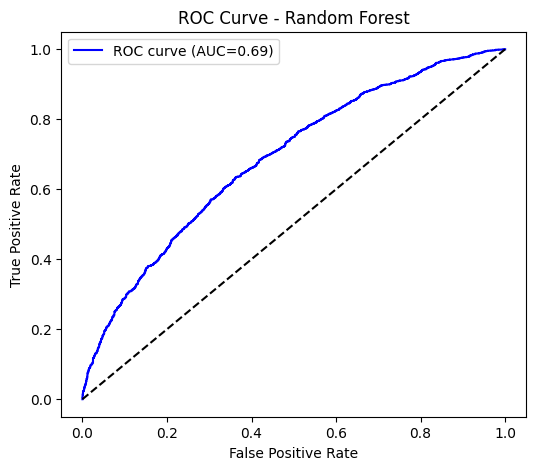

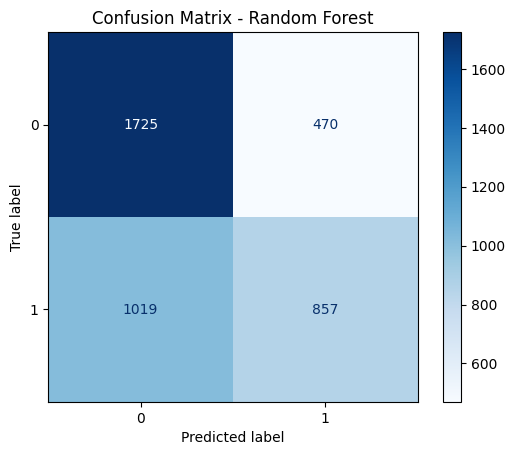

{'accuracy': 0.6342422009334316,
 'f1': 0.6232245324586012,
 'recall': 0.6342422009334316,
 'precision': 0.6365581311892569,
 'roc_auc': 0.6865640071688418}

In [20]:
model = RandomForestClassifier(**best_params, random_state=42)
test_model(model, X_train, y_train, X_test, y_test, model_name="Random Forest")

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.5533, F1: 0.5462, Recall: 0.5533, Precision: 0.5483
Fold 2 - Accuracy: 0.5797, F1: 0.5718, Recall: 0.5797, Precision: 0.5760
Fold 3 - Accuracy: 0.5584, F1: 0.5522, Recall: 0.5584, Precision: 0.5539
Fold 4 - Accuracy: 0.5685, F1: 0.5634, Recall: 0.5685, Precision: 0.5648
Fold 5 - Accuracy: 0.5688, F1: 0.5634, Recall: 0.5688, Precision: 0.5650

Overall Cross-validation results:

	- Accuracy: 0.5657 ± 0.0092
	- F1 Score: 0.5594 ± 0.0091
	- Recall: 0.5657 ± 0.0092
	- Precision: 0.5616 ± 0.0096
	- ROC AUC: 0.5837 ± 0.0107


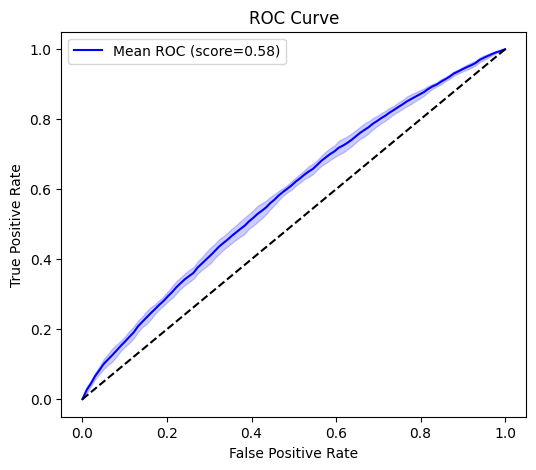

In [21]:
model_knn = KNeighborsClassifier()
_, _, _, _, _, _, _, _, _, best_params = fine_tune_and_cross_validate(X_train, y_train, model_knn, param_grid_knn)

KNN - Accuracy: 0.5763, F1: 0.5692, Recall: 0.5763, Precision: 0.5725
KNN - ROC AUC: 0.5966


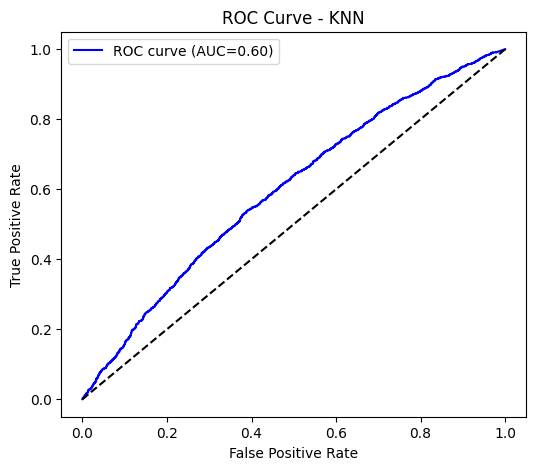

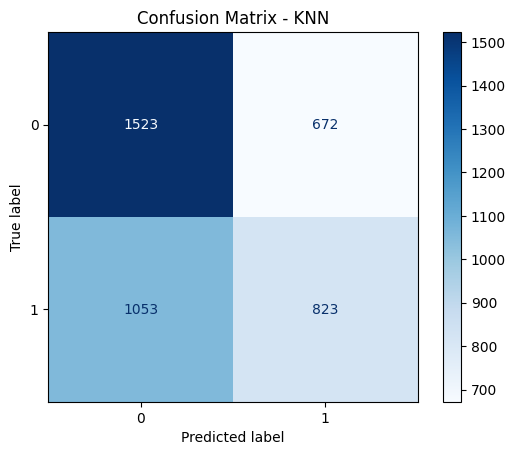

{'accuracy': 0.576271186440678,
 'f1': 0.5692446250723229,
 'recall': 0.576271186440678,
 'precision': 0.5724597792550598,
 'roc_auc': 0.5966177491973909}

In [22]:
model = KNeighborsClassifier(**best_params)
test_model(model, X_train, y_train, X_test, y_test, model_name="KNN")

Best hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6236, F1: 0.6037, Recall: 0.6236, Precision: 0.6313
Fold 2 - Accuracy: 0.6405, F1: 0.6247, Recall: 0.6405, Precision: 0.6481
Fold 3 - Accuracy: 0.5998, F1: 0.5815, Recall: 0.5998, Precision: 0.6010
Fold 4 - Accuracy: 0.6050, F1: 0.5872, Recall: 0.6050, Precision: 0.6071
Fold 5 - Accuracy: 0.6155, F1: 0.5970, Recall: 0.6155, Precision: 0.6201

Overall Cross-validation results:

	- Accuracy: 0.6169 ± 0.0144
	- F1 Score: 0.5988 ± 0.0151
	- Recall: 0.6169 ± 0.0144
	- Precision: 0.6215 ± 0.0169
	- ROC AUC: 0.6507 ± 0.0152


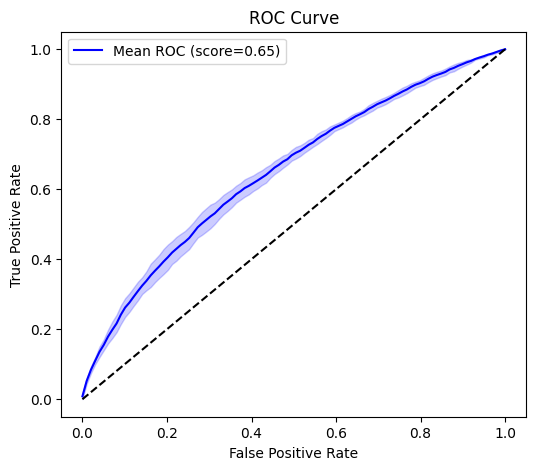

In [23]:
warnings.filterwarnings("ignore")
model_lr = LogisticRegression()
_, _, _, _, _, _, _, _, _, best_params = fine_tune_and_cross_validate(X_train, y_train, model_lr, param_grid_lr)

Logistic Regression - Accuracy: 0.6139, F1: 0.5967, Recall: 0.6139, Precision: 0.6172
Logistic Regression - ROC AUC: 0.6551


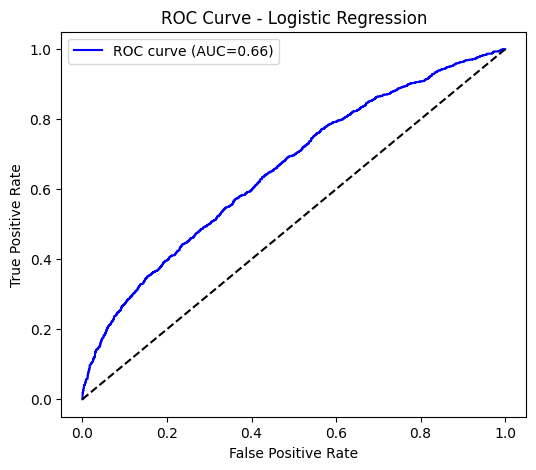

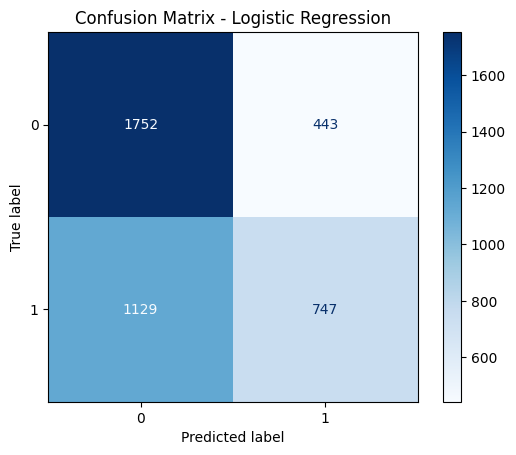

{'accuracy': 0.6138540899042004,
 'f1': 0.5967481141217847,
 'recall': 0.6138540899042004,
 'precision': 0.6171583674944411,
 'roc_auc': 0.6550869149210019}

In [24]:
model = LogisticRegression(**best_params)
test_model(model, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

Best hyperparameters: {'alpha': 10, 'binarize': 0.0, 'fit_prior': False}
Cross-validation results for each fold:

Fold 1 - Accuracy: 0.6131, F1: 0.6111, Recall: 0.6131, Precision: 0.6113
Fold 2 - Accuracy: 0.6190, F1: 0.6185, Recall: 0.6190, Precision: 0.6182
Fold 3 - Accuracy: 0.5977, F1: 0.5962, Recall: 0.5977, Precision: 0.5960
Fold 4 - Accuracy: 0.5967, F1: 0.5952, Recall: 0.5967, Precision: 0.5950
Fold 5 - Accuracy: 0.6149, F1: 0.6138, Recall: 0.6149, Precision: 0.6136

Overall Cross-validation results:

	- Accuracy: 0.6083 ± 0.0092
	- F1 Score: 0.6070 ± 0.0095
	- Recall: 0.6083 ± 0.0092
	- Precision: 0.6068 ± 0.0095
	- ROC AUC: 0.6343 ± 0.0142


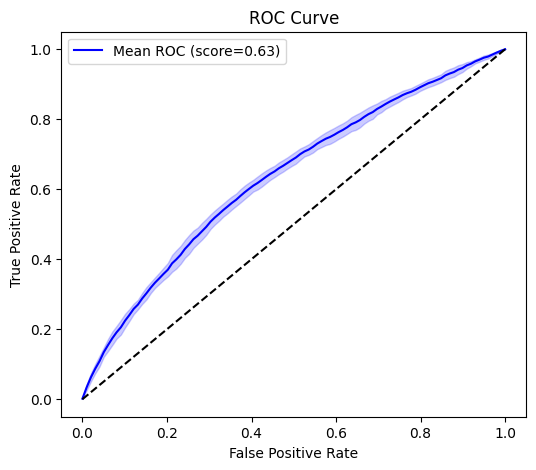

In [25]:
model_nb = BernoulliNB()
_, _, _, _, _, _, _, _, _, best_params = fine_tune_and_cross_validate(X_train, y_train, model_nb, param_grid_bnb)

Bernoulli Naive Bayes - Accuracy: 0.6146, F1: 0.6137, Recall: 0.6146, Precision: 0.6135
Bernoulli Naive Bayes - ROC AUC: 0.6464


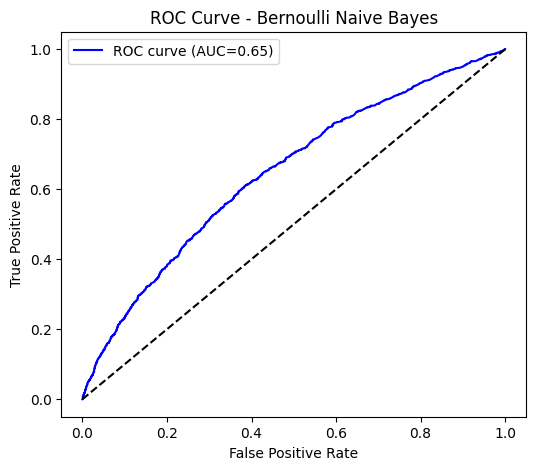

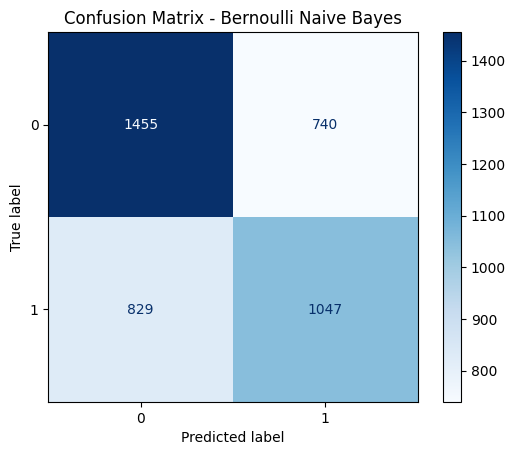

{'accuracy': 0.6145910095799558,
 'f1': 0.6137379997619948,
 'recall': 0.6145910095799558,
 'precision': 0.6134729429397275,
 'roc_auc': 0.646353288876153}

In [26]:
model = BernoulliNB(**best_params)
test_model(model, X_train, y_train, X_test, y_test, model_name="Bernoulli Naive Bayes")